### Precision and Recall in ML

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('heart_v2.csv')
df.head(2)

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0


In [5]:
df['target']=df['heart disease']

In [6]:
df.head(2)

,age,sex,BP,cholestrol,heart disease,target
0,70,1,130,322,1,1
1,67,0,115,564,0,0


In [7]:
del df['heart disease']

In [8]:
df.head(2)

,age,sex,BP,cholestrol,target
0,70,1,130,322,1
1,67,0,115,564,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


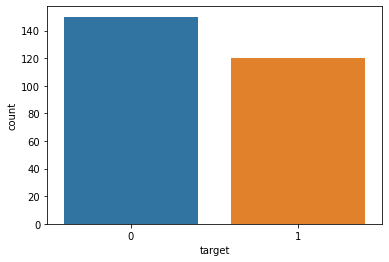

In [9]:
sns.countplot(df['target'])
plt.show()

In [10]:
df['target'].value_counts()

0    150
1    120
Name: target, dtype: int64

In [11]:
X=df.drop('target',axis=1)
y=df.target

In [12]:
type(y)

pandas.core.series.Series

In [13]:
type(X)

pandas.core.frame.DataFrame

In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 70% training and 30% test

In [16]:
train_score = []
test_score = []
k_values = []

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
for k in range(1, 21):
    k_values.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

In [20]:
max_test_score = max(test_score)

In [21]:
test_scores_ind = [i for i, j in enumerate(test_score) if j == max_test_score]
print('Max test score {} and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

Max test score 69.1358024691358 and k = [2, 4]


In [22]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(3)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6172839506172839

In [26]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(2)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.691358024691358

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,38,7,45
1,18,18,36
All,56,25,81


### What is Precision??

### What is recall in Model Evaluation?

#### The Easiest Metric to Understand – Accuracy 

In [30]:
# what is f1-score? when do we need it

In [31]:
from sklearn.metrics import f1_score

In [32]:
# ROC CURVE??

In [33]:
# 1. ROC Curves(Receiver Operating Characteristic Curve):

In [34]:
# Let us generate a ROC curve for our model with k = 3.

In [40]:
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve

In [36]:
y_pred_proba=knn.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

In [37]:
roc_auc_score(y_test, y_pred_proba)

0.6950617283950618

In [38]:
# 2. Precision-Recall Curve (PRC)

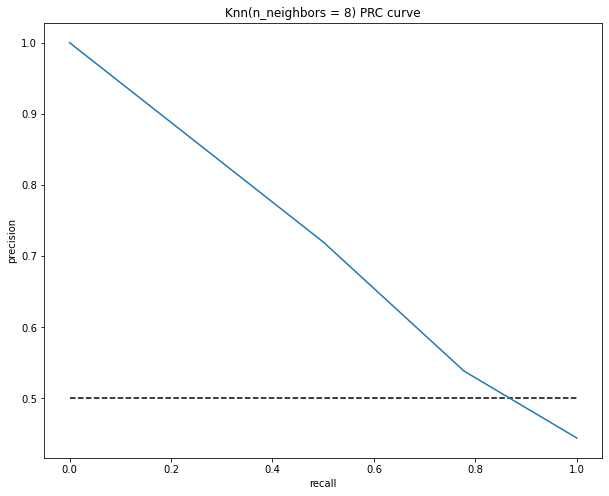

In [41]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'Knn')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Knn(n_neighbors = 8) PRC curve')
plt.show()

In [1]:
# what is the difference between precision and recall-WIKIPEDIA??

In [2]:
# When do we eed high precision or high recall?